## color thresholding

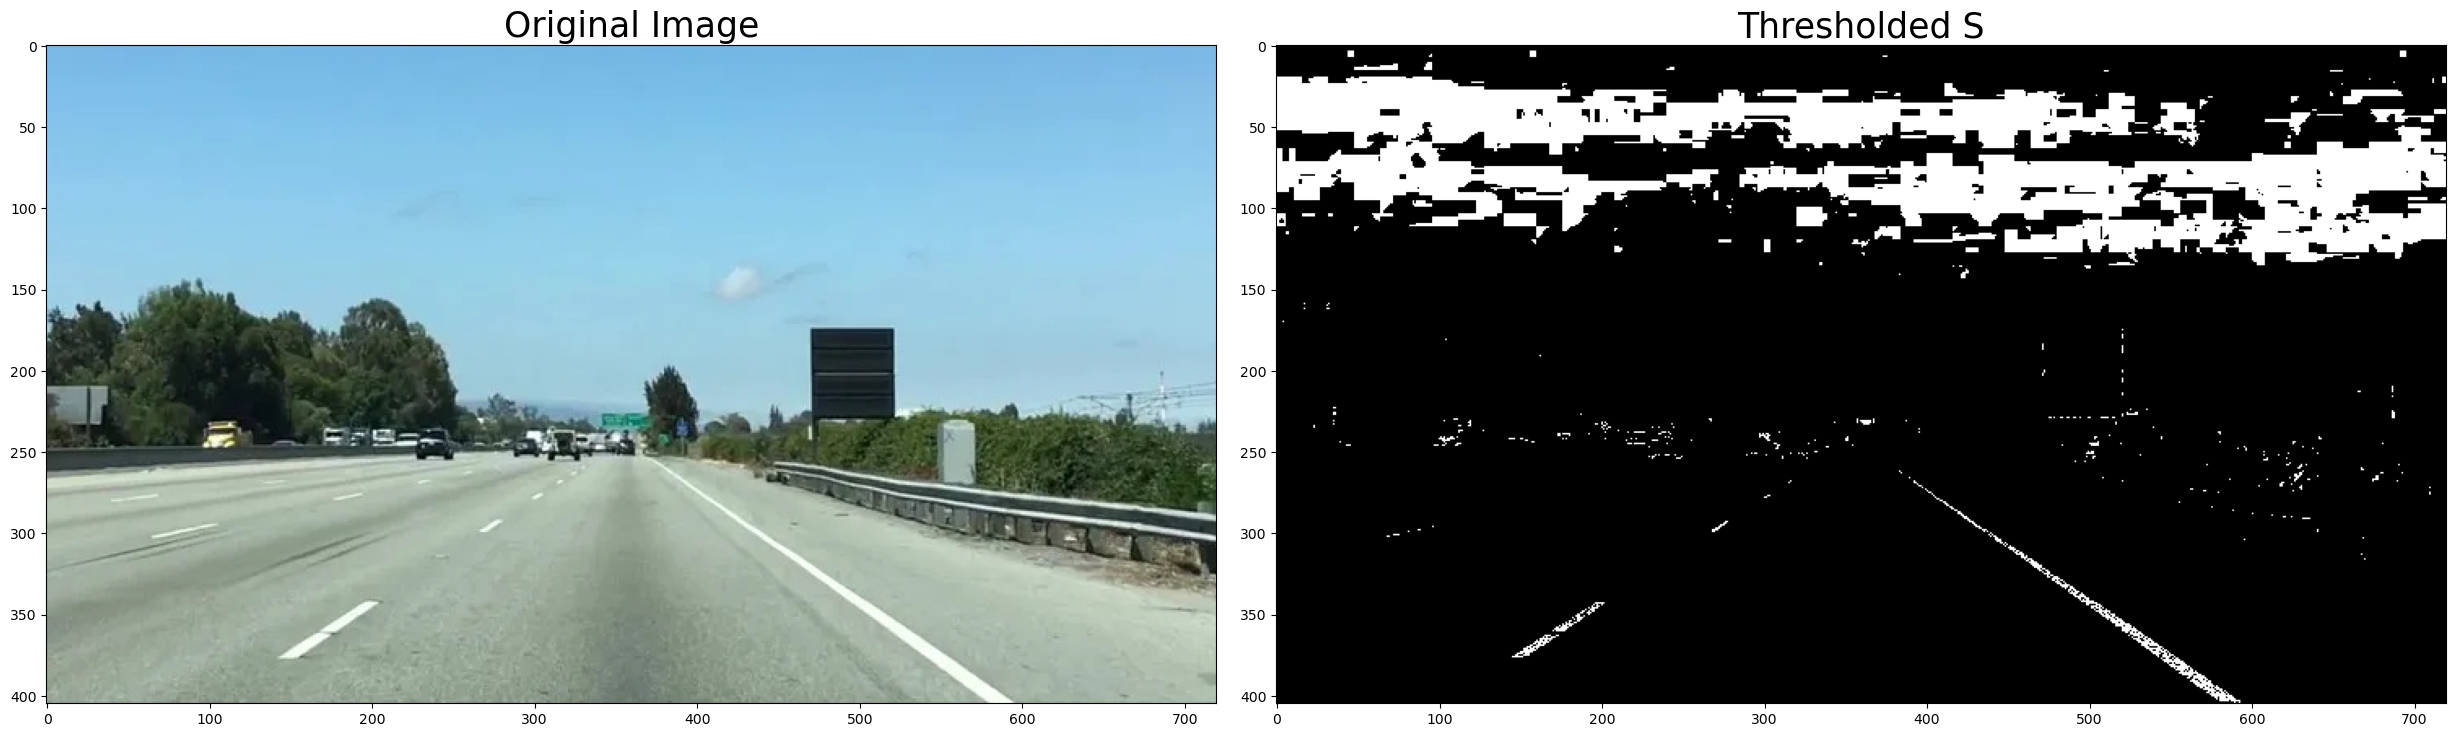

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
image = mpimg.imread('testimage.jpg')
# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    binary_output = np.zeros_like(hls[:,:,2])
    binary_output[(hls[:,:,2] > thresh[0]) & (hls[:,:,2] <= thresh[1])] = 1
    # 3) Return a binary image of threshold result
    #binary_output = np.copy(img) # placeholder line
    return binary_output
    
hls_binary = hls_select(image, thresh=(180, 255))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Region Masking

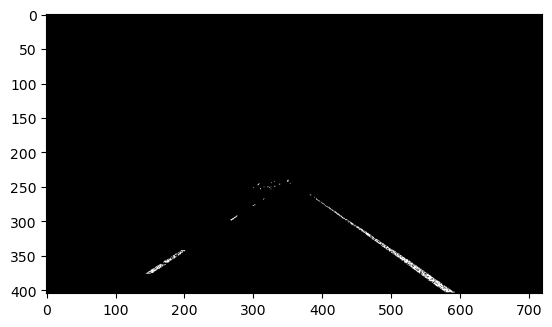

In [3]:
height, width= hls_binary.shape
ROI_polygon= np.array([[(100,height),(330,230),(650,height)]], dtype= np.int32)
blank_image= np.zeros_like(hls_binary)
ROI_white= cv2.fillPoly(blank_image, ROI_polygon,255)
ROI_image= cv2.bitwise_and(hls_binary, ROI_white)
plt.imshow(ROI_image,cmap='gray')

## Edge detection

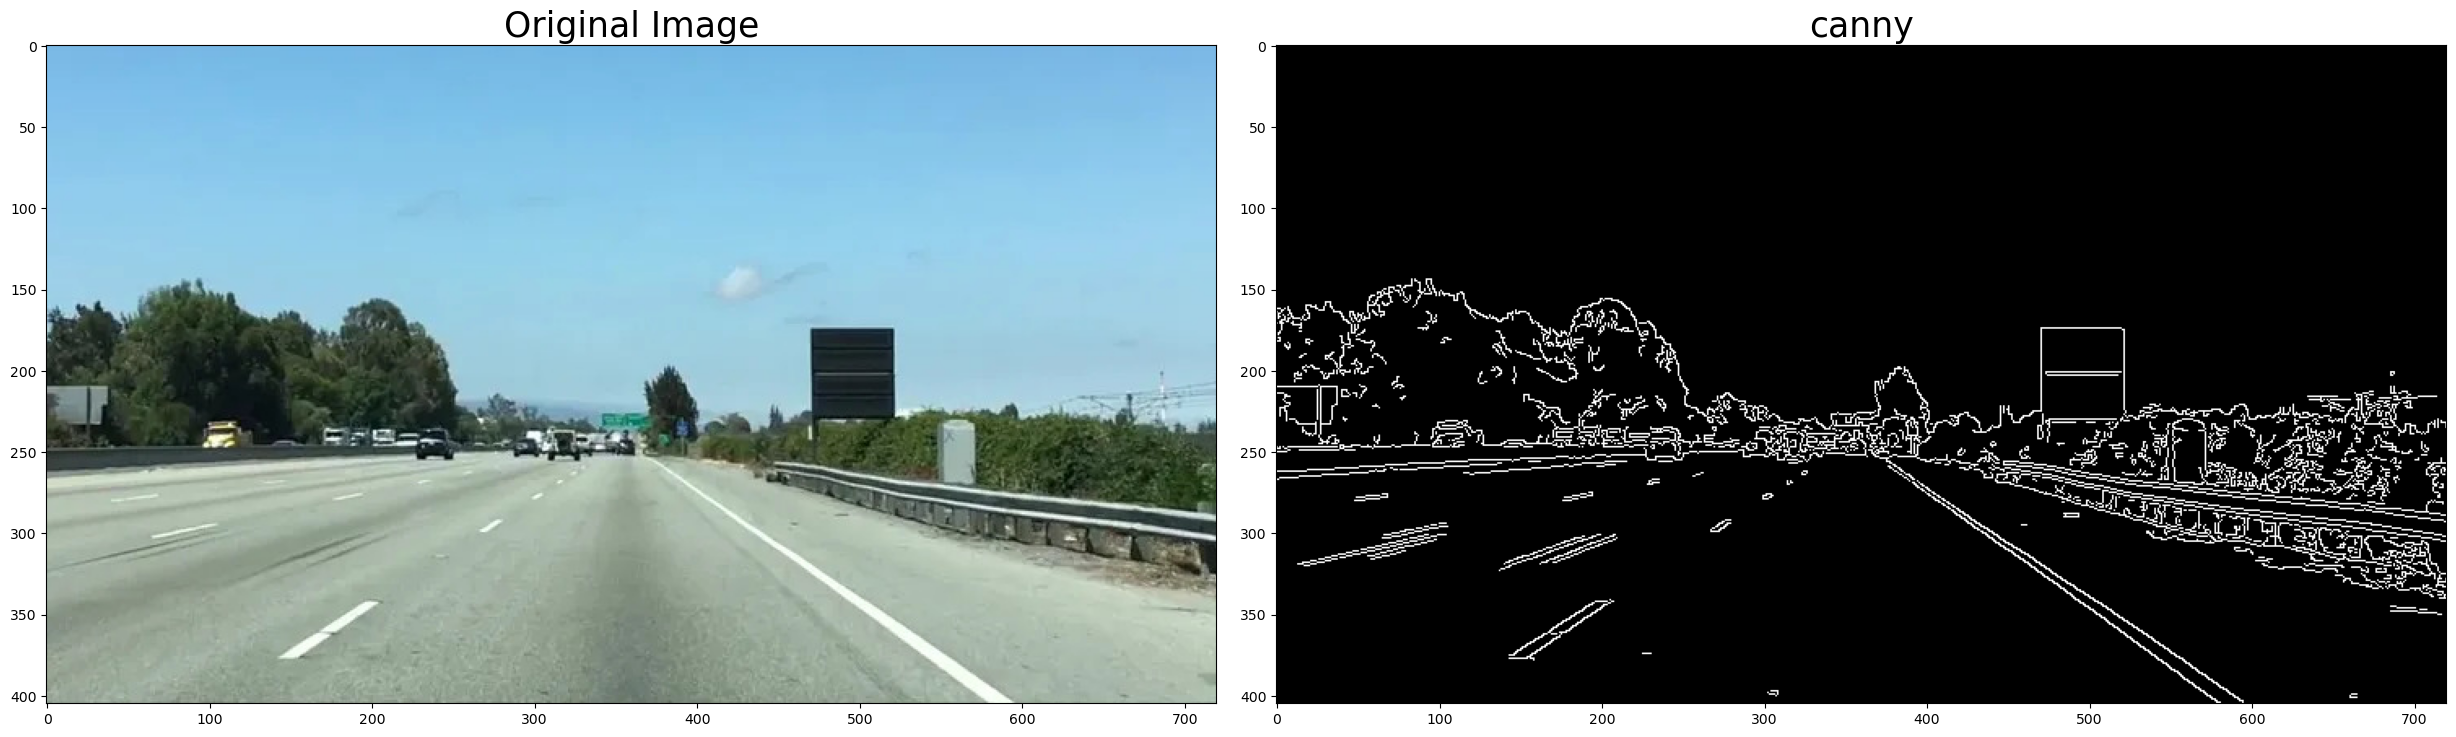

In [6]:
image = mpimg.imread('testimage.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edge_image = cv2.Canny(gray_image,100,200)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(edge_image, cmap='gray')
ax2.set_title('canny', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)